In [1]:
class Ad:
    def __init__(self):
        self.N1 = 0
        self.N0 = 0
        self.Dist = 1
    def reward(self,rew):
        if rew==1:
            self.N1+=1
        else:
            self.N0+=1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def opt_select(ADS):
    from random import betavariate,randint
    k=0
    Dist=[]
    for i in ADS:
        
        Dist.append((betavariate(i.N1+1 , i.N0+1),k))
        k+=1
    Dist.sort()
    K = []
    for i in Dist:
        if i[0] == Dist[-1][0]:
            K.append(i[1])
    K.sort()
    return randint(K[0] , K[-1])

In [4]:
DataSet = pd.read_csv("Ads_CTR_Optimisation.csv")
DataArray = np.matrix(DataSet)
r,c = DataArray.shape
ADS=[]
for i in range(c):
    ADS.append(Ad())
Ad_shown = []
TotalRew=0
DataSet

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


We have 10 advertisments for a product. We dont know which one is going to be the most effective. The dataset contains data of 10000 users depicting which ads from 10 will they click if shown to them. We need to maximize the clicks

In [5]:
for i in range(r):

    k = opt_select(ADS)
    Ad_shown.append(k+1)
    ADS[k].reward(DataArray[i,k])
    TotalRew+=DataArray[i,k]

In [6]:
print("Clicked :" + str(TotalRew) + "/" +str(r))

Clicked :2621/10000


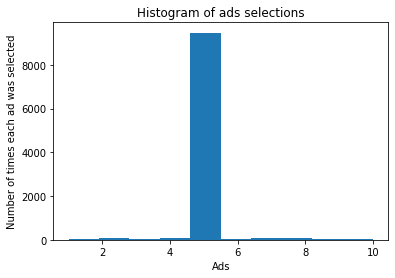

In [7]:
plt.hist(Ad_shown)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()